## Paris Housing Price Prediction Model



This is a set of data created from imaginary data of house prices in an urban environment - Paris. The author "MSSMARTYPANTS" recommend using this dataset for educational purposes, for practice and to acquire the necessary knowledge. Hence, we are using this dataset for eductional purpose only. This dataset can be found in open source data science enthusiast website called kaggle.com. link - https://www.kaggle.com/datasets/mssmartypants/paris-housing-price-prediction?select=ParisHousing.csv

Further analysis is done below:

The goal for this project is to analyze the prices of housing in Paris and to create a machine learning model to further predict the price of housing based on features that have high correlation with the price.

## Importing necessary libraries

Libraries are the build in machine learning models which are collection of precompiled codes that are used for specific operations. There tends to have differnt kinds of libraries in python. It made users to write and compile code in very simple and short way. 

    Pandas - Data manipulation and analysis (Row and Column)
    Numpy - Provides multidimesnional array
    Matplotlib - Graphical representatin
    Seaborn - Graphical visualization based on matplotlib
    Skit-learn - Simple and efficient tools but works with complex data. It supports Supervised and unsupervised machine                          learning algorithms.
    
 We have explore each and every libraries explained above here.

In [1]:
# Importing all the neccessary libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Loading the required data
df=pd.read_csv('ParisHousing.csv')
# pd.set_option('display.max_columns',30)
df.head()

squareMeters  numberOfRooms  hasYard  hasPool  floors  cityCode  \
0         75523              3        0        1      63      9373   
1         80771             39        1        1      98     39381   
2         55712             58        0        1      19     34457   
3         32316             47        0        0       6     27939   
4         70429             19        1        1      90     38045   

   cityPartRange  numPrevOwners  made  isNewBuilt  hasStormProtector  \
0              3              8  2005           0                  1   
1              8              6  2015           1                  0   
2              6              8  2021           0                  0   
3             10              4  2012           0                  1   
4              3              7  1990           1                  0   

   basement  attic  garage  hasStorageRoom  hasGuestRoom      price  
0      4313   9005     956               0             7  7559081.5  
1      3653   2436     128               1             2  8085989.5  
2      2937   8852     135               1             9  5574642.1  
3       659   7141     359               0             3  3232561.2  
4      8435   2429     292               1             4  7055052.0

In [3]:
# How many rows and what columns are in the dataset
print(len(df))
df.columns

10000


Index(['squareMeters', 'numberOfRooms', 'hasYard', 'hasPool', 'floors',
       'cityCode', 'cityPartRange', 'numPrevOwners', 'made', 'isNewBuilt',
       'hasStormProtector', 'basement', 'attic', 'garage', 'hasStorageRoom',
       'hasGuestRoom', 'price'],
      dtype='object')

### Column - description
All attributes are numeric variables and they are listed bellow:

    1.squareMeters
    2.numberOfRooms
    3.hasYard
    4.hasPool
    5.floors - number of floors
    6.cityCode - zip code
    7.cityPartRange - the higher the range, the more exclusive the neighbourhood is
    8.numPrevOwners - number of prevoious owners
    9.made - year
    10.isNewBuilt
    11.hasStormProtector
    12.basement - basement square meters
    13.attic - attic square meteres
    14.garage - garage size
    15.hasStorageRoom
    16.hasGuestRoom - number of guest rooms
    17.price - predicted value

In [4]:
# Look at the information to see if there are any strange or interesting numbers 
# that would imply that there are some outliers or incorrect information
# statstical analysis
df.describe()

squareMeters  numberOfRooms       hasYard       hasPool        floors  \
count   10000.00000   10000.000000  10000.000000  10000.000000  10000.000000   
mean    49870.13120      50.358400      0.508700      0.496800     50.276300   
std     28774.37535      28.816696      0.499949      0.500015     28.889171   
min        89.00000       1.000000      0.000000      0.000000      1.000000   
25%     25098.50000      25.000000      0.000000      0.000000     25.000000   
50%     50105.50000      50.000000      1.000000      0.000000     50.000000   
75%     74609.75000      75.000000      1.000000      1.000000     76.000000   
max     99999.00000     100.000000      1.000000      1.000000    100.000000   

           cityCode  cityPartRange  numPrevOwners         made    isNewBuilt  \
count  10000.000000   10000.000000   10000.000000  10000.00000  10000.000000   
mean   50225.486100       5.510100       5.521700   2005.48850      0.499100   
std    29006.675799       2.872024       2.856667      9.30809      0.500024   
min        3.000000       1.000000       1.000000   1990.00000      0.000000   
25%    24693.750000       3.000000       3.000000   1997.00000      0.000000   
50%    50693.000000       5.000000       5.000000   2005.50000      0.000000   
75%    75683.250000       8.000000       8.000000   2014.00000      1.000000   
max    99953.000000      10.000000      10.000000   2021.00000      1.000000   

       hasStormProtector      basement        attic       garage  \
count       10000.000000  10000.000000  10000.00000  10000.00000   
mean            0.499900   5033.103900   5028.01060    553.12120   
std             0.500025   2876.729545   2894.33221    262.05017   
min             0.000000      0.000000      1.00000    100.00000   
25%             0.000000   2559.750000   2512.00000    327.75000   
50%             0.000000   5092.500000   5045.00000    554.00000   
75%             1.000000   7511.250000   7540.50000    777.25000   
max             1.000000  10000.000000  10000.00000   1000.00000   

       hasStorageRoom  hasGuestRoom         price  
count    10000.000000   10000.00000  1.000000e+04  
mean         0.503000       4.99460  4.993448e+06  
std          0.500016       3.17641  2.877424e+06  
min          0.000000       0.00000  1.031350e+04  
25%          0.000000       2.00000  2.516402e+06  
50%          1.000000       5.00000  5.016180e+06  
75%          1.000000       8.00000  7.469092e+06  
max          1.000000      10.00000  1.000677e+07

In [5]:
# column - price information
prices = df['price']
print(prices)

0       7559081.5
1       8085989.5
2       5574642.1
3       3232561.2
4       7055052.0
          ...    
9995     176425.9
9996    4448474.0
9997    8390030.5
9998    5905107.0
9999     146708.4
Name: price, Length: 10000, dtype: float64


In [6]:
# Understand the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       10000 non-null  int64  
 1   numberOfRooms      10000 non-null  int64  
 2   hasYard            10000 non-null  int64  
 3   hasPool            10000 non-null  int64  
 4   floors             10000 non-null  int64  
 5   cityCode           10000 non-null  int64  
 6   cityPartRange      10000 non-null  int64  
 7   numPrevOwners      10000 non-null  int64  
 8   made               10000 non-null  int64  
 9   isNewBuilt         10000 non-null  int64  
 10  hasStormProtector  10000 non-null  int64  
 11  basement           10000 non-null  int64  
 12  attic              10000 non-null  int64  
 13  garage             10000 non-null  int64  
 14  hasStorageRoom     10000 non-null  int64  
 15  hasGuestRoom       10000 non-null  int64  
 16  price              1000

### Exploratory Data Analysis (EDA), Data Manipulation and Filtering

Exploratory Data Analysis (EDA) is an approach to analyzing datasets to summarize their main characteristics, often with visual methods. EDA is used for seeing what the data can tell us before the modeling task.

Data cleaning is the process where data which has missing values or any kind of outliers are changed, converted or filled with specific values after statsical analysis.

There are built in Sklearn libraries to see the description of data in the datasets. We have used panda’s head, unique, isnull, shape, and describe libraries to see the overview of data. Pandas.Head() provides 5 data’s in rows and columns, pandas.unique() provides values having same weight, pandas.isnull() checks whether there is null values in specified columns or not, pandas.shape which is tuple libraries shows the total rows and columns present in dataset and pandas.descibe() tell about the general statistical information. With the help of analysis from the data, we go to data cleaning process.

In [7]:
# Look through the columns to identify any null or NA values
df.isna().any()

squareMeters         False
numberOfRooms        False
hasYard              False
hasPool              False
floors               False
cityCode             False
cityPartRange        False
numPrevOwners        False
made                 False
isNewBuilt           False
hasStormProtector    False
basement             False
attic                False
garage               False
hasStorageRoom       False
hasGuestRoom         False
price                False
dtype: bool

There are no any null values present in any columns - ready to go

# Data Visualization

Data visualization often results in graphical images of data or concepts, which assists making decisions (Ware, 2012). It allows to see how the data is distributed, detect outliers and allows us to convey information more effectively. It is very effective way to see represent of datas in dataset. Boxplot, Histogram, scatter-plot etc are some of graphical representation of data. In Data visualization, it shows pattern between differnt features which can help in further analyis process.

Here, in this model, i have used necessary visualization graph which represent datas. It really helps my model to achieve higher accuracy. I had a great experience using graphs and i enjoyed too much.

In [8]:
import warnings                     #Stopping warning sign
warnings.filterwarnings("ignore")

### Coorelation Heatmap

A correlation is the part of statstics which shows the relation or identify the assiociation with its corresponding columns. Correlation alway tends to show relation between ranges of -1 and 1. -1 shows low relation and 1 shows strong relation between two columns or features. A heat map uses a warm-to-cool color spectrum to show you which parts of a page receive the most attention.

In our case, we have dataset containing several attributes which seems intercorrelated with each others. Lets see what shows in Correlation Heatmap.

In [9]:
# Look at the correlation between all the features/columns
df.corr()

squareMeters  numberOfRooms   hasYard   hasPool    floors  \
squareMeters           1.000000       0.009573 -0.006650 -0.005594  0.001109   
numberOfRooms          0.009573       1.000000 -0.011240  0.017015  0.022244   
hasYard               -0.006650      -0.011240  1.000000  0.015514 -0.000883   
hasPool               -0.005594       0.017015  0.015514  1.000000 -0.004006   
floors                 0.001109       0.022244 -0.000883 -0.004006  1.000000   
cityCode              -0.001541       0.009040  0.006760  0.008072  0.002207   
cityPartRange          0.008758       0.008340  0.005023  0.014613 -0.004921   
numPrevOwners          0.016619       0.016766  0.004279 -0.006848  0.002463   
made                  -0.007207       0.003978  0.002214  0.001894  0.005022   
isNewBuilt            -0.010667      -0.002865 -0.008370  0.000188  0.002458   
hasStormProtector      0.007480      -0.001656 -0.007598 -0.001001 -0.008566   
basement              -0.003960      -0.013990 -0.008558 -0.007268  0.006228   
attic                 -0.000588       0.012061 -0.003085 -0.011901 -0.000270   
garage                -0.017246       0.023188 -0.004626  0.004832  0.011303   
hasStorageRoom        -0.003486      -0.004760 -0.009506  0.001238  0.003616   
hasGuestRoom          -0.000623      -0.015529 -0.007276  0.001123 -0.021155   
price                  0.999999       0.009591 -0.006119 -0.005070  0.001654   

                   cityCode  cityPartRange  numPrevOwners      made  \
squareMeters      -0.001541       0.008758       0.016619 -0.007207   
numberOfRooms      0.009040       0.008340       0.016766  0.003978   
hasYard            0.006760       0.005023       0.004279  0.002214   
hasPool            0.008072       0.014613      -0.006848  0.001894   
floors             0.002207      -0.004921       0.002463  0.005022   
cityCode           1.000000       0.011334      -0.007549  0.009266   
cityPartRange      0.011334       1.000000       0.009238  0.007748   
numPrevOwners     -0.007549       0.009238       1.000000  0.006858   
made               0.009266       0.007748       0.006858  1.000000   
isNewBuilt        -0.000224      -0.001874      -0.017420 -0.001678   
hasStormProtector -0.004941       0.005224       0.002522 -0.000645   
basement           0.002652       0.004743      -0.000862 -0.005506   
attic             -0.002019       0.010696       0.000719  0.013773   
garage            -0.002208      -0.001648       0.020268  0.005687   
hasStorageRoom     0.002554      -0.011338       0.031707 -0.007868   
hasGuestRoom      -0.003338      -0.007153      -0.006082 -0.005431   
price             -0.001539       0.008813       0.016619 -0.007210   

                   isNewBuilt  hasStormProtector  basement     attic  \
squareMeters        -0.010667           0.007480 -0.003960 -0.000588   
numberOfRooms       -0.002865          -0.001656 -0.013990  0.012061   
hasYard             -0.008370          -0.007598 -0.008558 -0.003085   
hasPool              0.000188          -0.001001 -0.007268 -0.011901   
floors               0.002458          -0.008566  0.006228 -0.000270   
cityCode            -0.000224          -0.004941  0.002652 -0.002019   
cityPartRange       -0.001874           0.005224  0.004743  0.010696   
numPrevOwners       -0.017420           0.002522 -0.000862  0.000719   
made                -0.001678          -0.000645 -0.005506  0.013773   
isNewBuilt           1.000000           0.003200 -0.015986  0.020127   
hasStormProtector    0.003200           1.000000 -0.005001 -0.003753   
basement            -0.015986          -0.005001  1.000000 -0.003180   
attic                0.020127          -0.003753 -0.003180  1.000000   
garage               0.002749           0.003758  0.000117 -0.000611   
hasStorageRoom       0.007011           0.001401 -0.010815 -0.000789   
hasGuestRoom         0.019895          -0.006549 -0.020732 -0.011995   
price               -0.010643           0.007496 -0.003967 -0.000600   

  

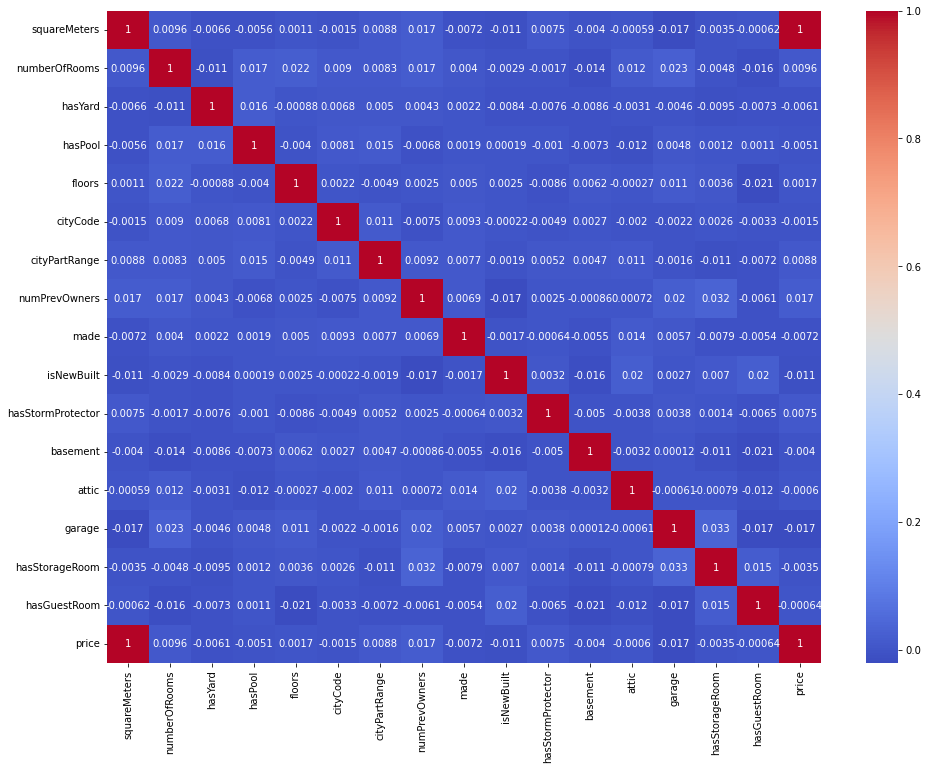

In [10]:
# Graphical - correlation matrix
corr = df.corr()
plt.figure(figsize = (16, 12))
sns.heatmap(corr, annot = True , cmap = 'coolwarm')
plt.show()

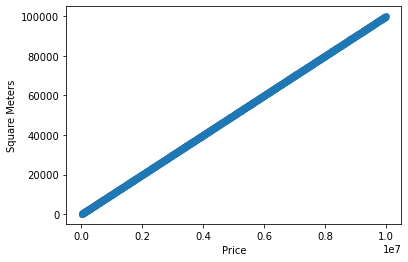

In [11]:
# I decided to take three of the features that seemed to have a higher correlation with the price.
plt.scatter(df['price'], df['squareMeters'], alpha = 0.1)
plt.xlabel('Price')
plt.ylabel('Square Meters')
plt.show()

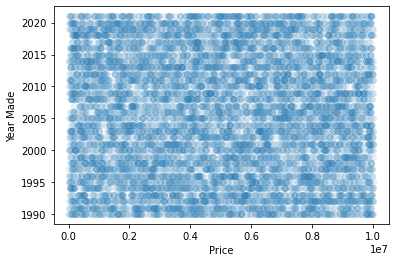

In [12]:
plt.scatter(df['price'], df['made'], alpha = 0.1)
plt.xlabel('Price')
plt.ylabel('Year Made')
plt.show()

### Histogram

A histogram is a graph used to represent the frequency distribution of a few data points of one variable. Histograms often classify data into various “bins” or “range groups” and count how many data points belong to each of those bins.

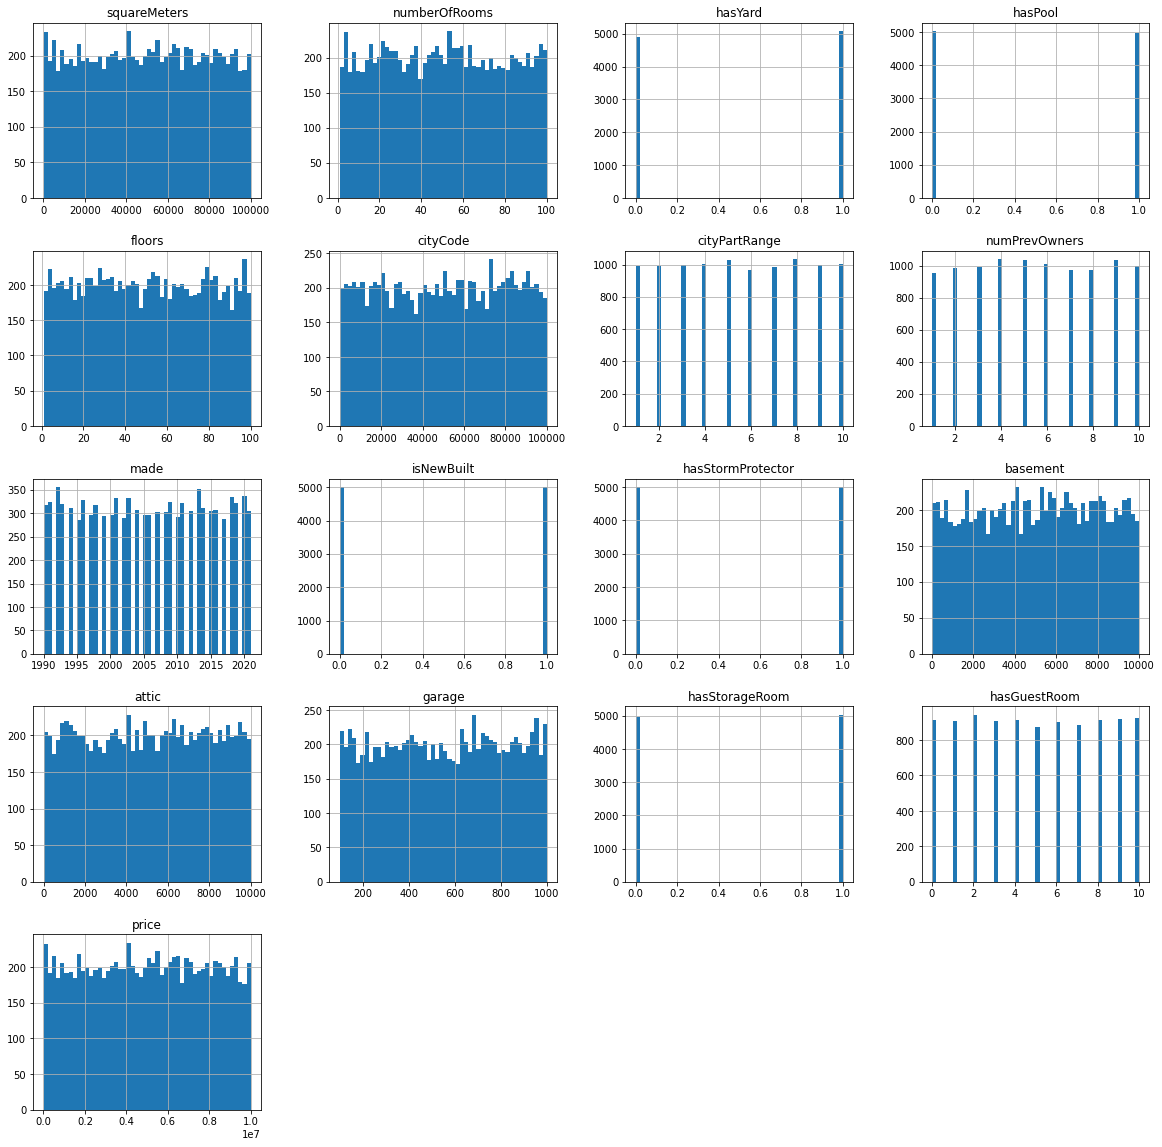

In [13]:
df.hist(bins = 50, figsize = (20,20))
plt.show()

### Displot

Displot plots the histogram and KDE for a univariate distribution. it shows the how data's are dispersed around the average and whether it forms normal or Gaussian distribution plot which tell the normal data's present in the particular features. It helps to pick out the data's distribution and shows is there any sort of values which are unique or highly far away from the average point.

<AxesSubplot:ylabel='Density'>

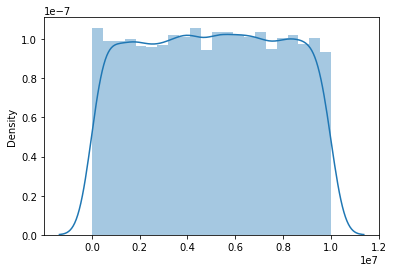

In [14]:
sns.distplot(x=df['price'])

### Pair plot

A pair plot is a 2D categorical scatter plot that represents the pair wise relationship between the numerical variables in a data frame.

For a dataset with N numerical values, it plots Nc2 i.e n!/2!*(n-2)! plots. Pair Plots are useful when the number of numerical variables is high, though it is not useful for representing higher dimensional data.

<Figure size 1728x1440 with 0 Axes>

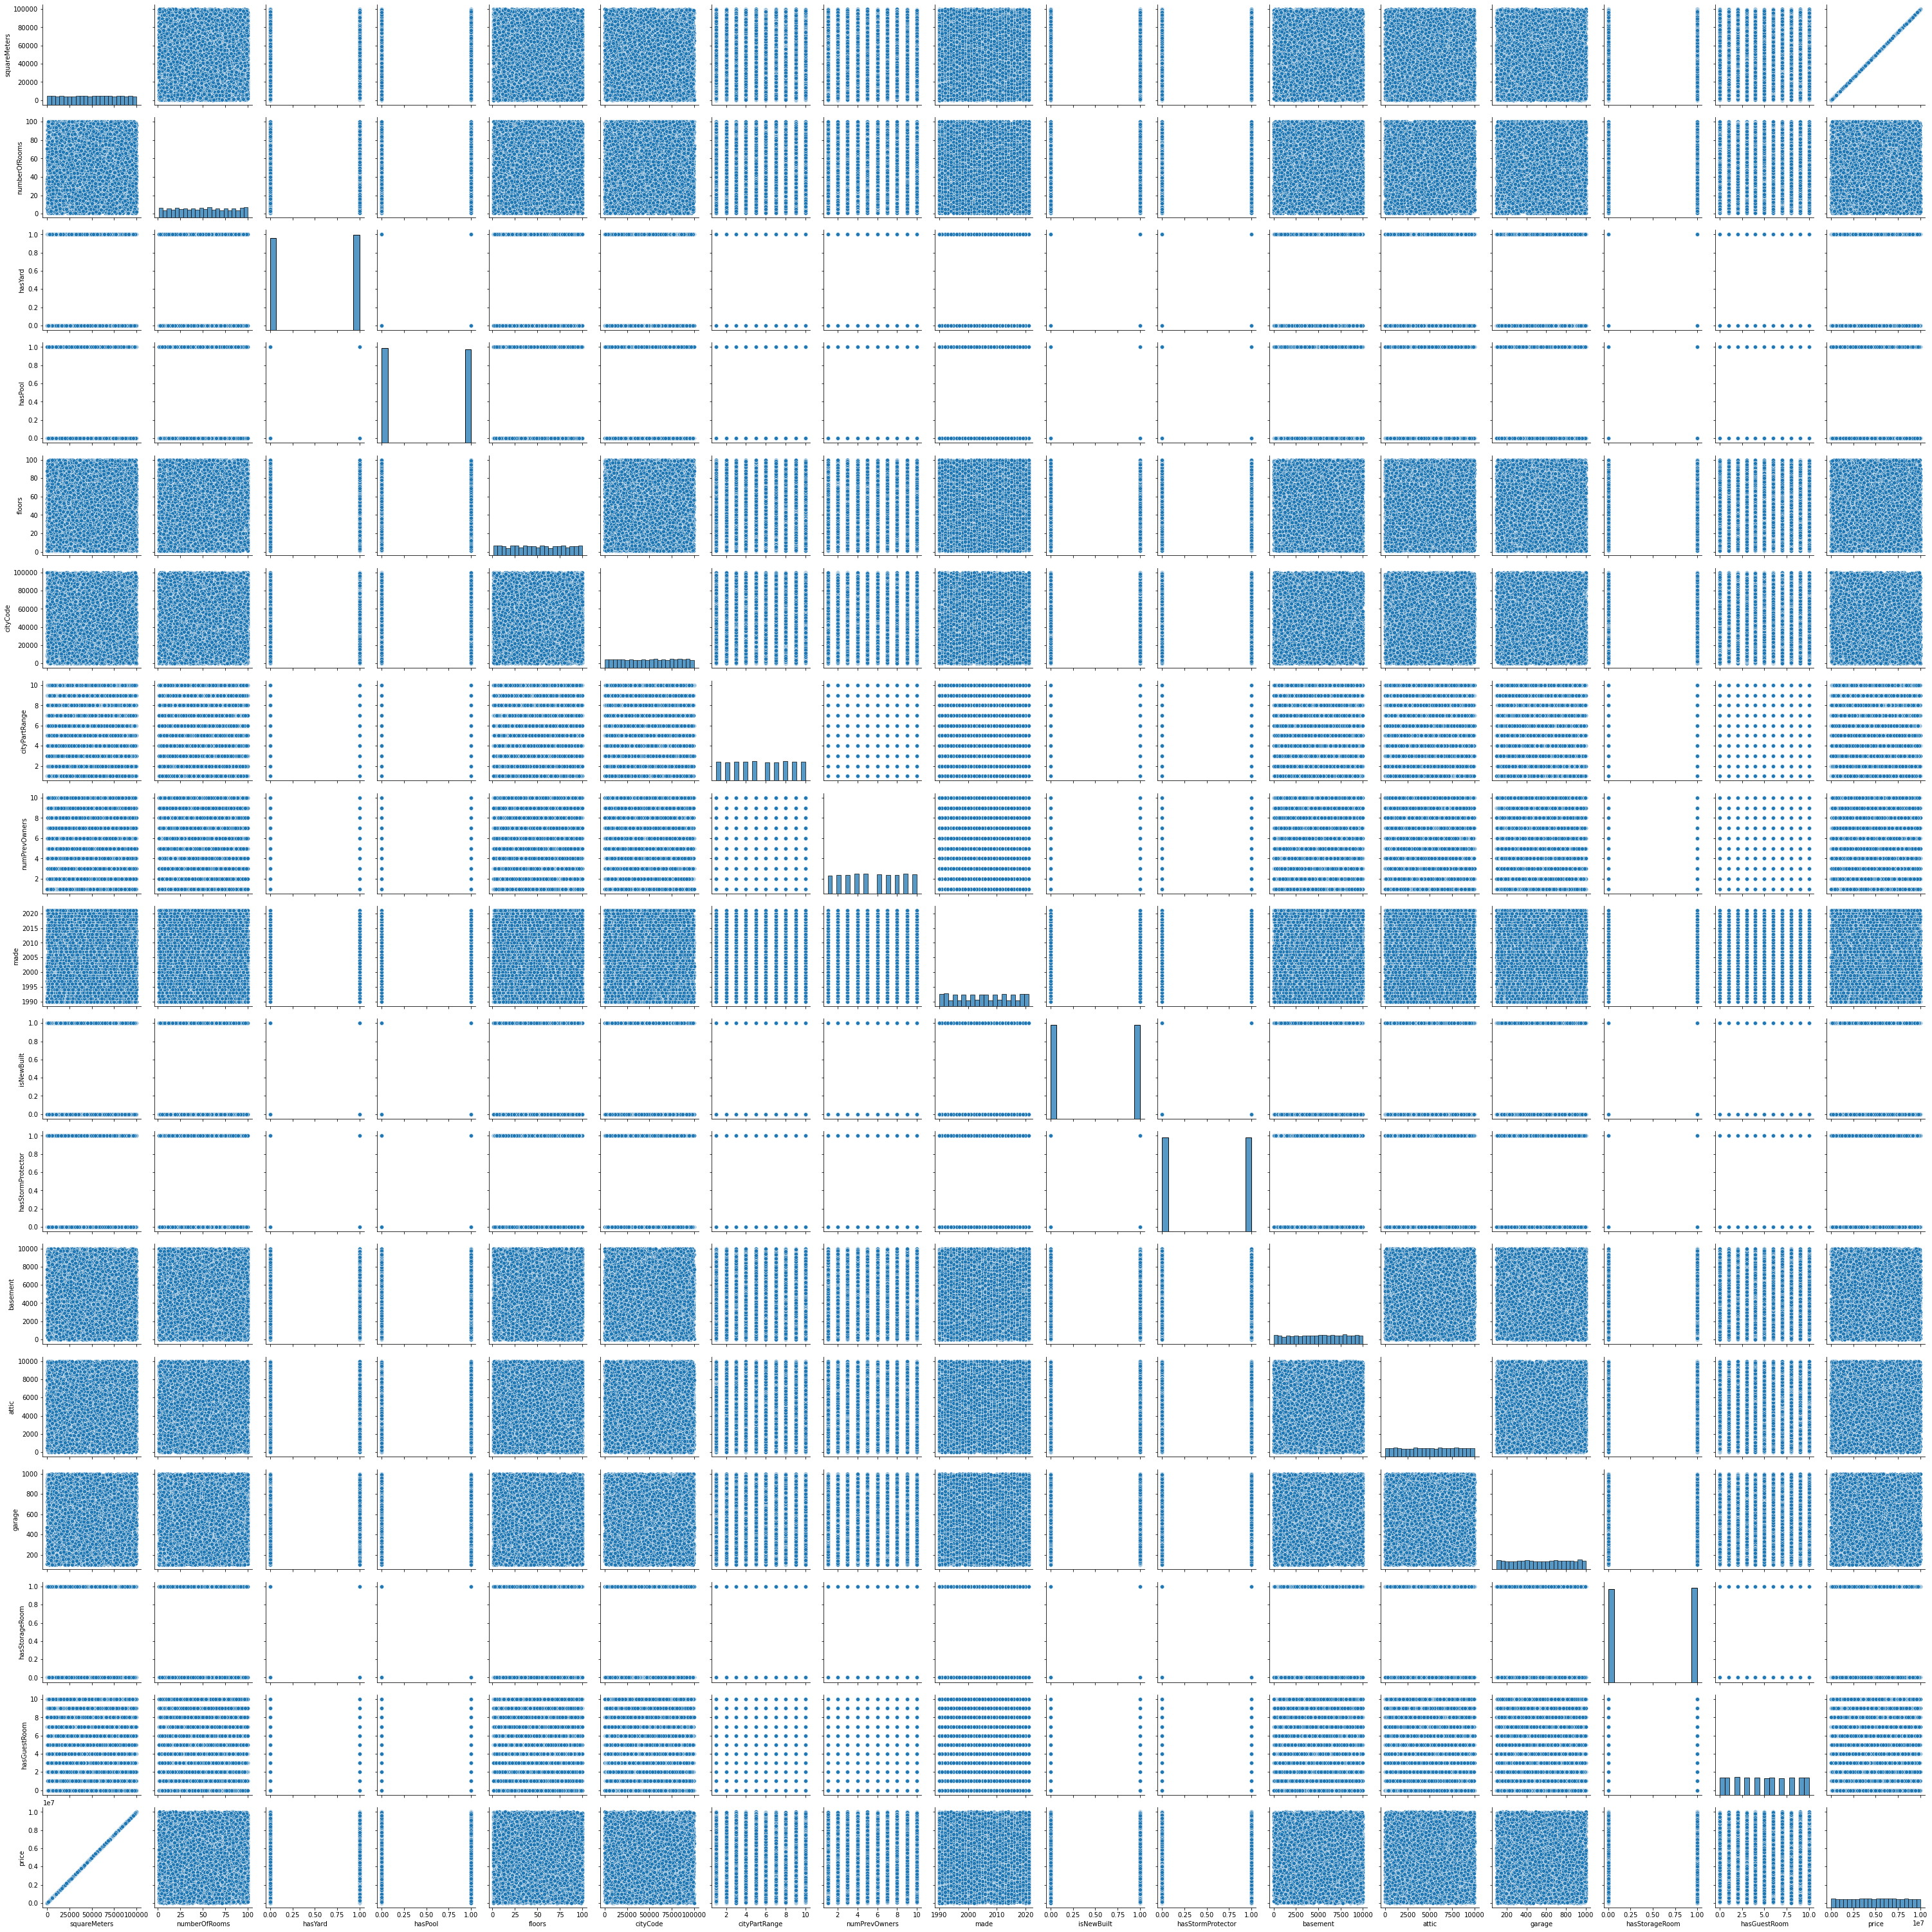

In [15]:
plt.figure(figsize = (24, 20))
sns.pairplot(df)

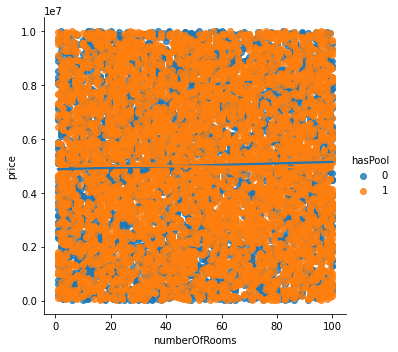

In [16]:
ax = sns.lmplot(x = 'numberOfRooms' , y = 'price' , data = df , hue = 'hasPool')

### Splitting into Training and Testing dataset

Dependent variables are those variables which has the relationsip with the other varibles that changes with respect to the other varible i.e. Independent vaibales. Independent variables are those varibale which's values doesn't matter with other values but its values matter to other values.

In [17]:
# Splitting the dataset into dependent and independedentfeatures
X = df.drop(['price'],axis=1) # indpendent feature
y = df['price']               # dependent feature

# Importing ML algorithms

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.metrics import classification_report     #Classificaton Report
from sklearn.metrics import mean_absolute_error       #Mean Absoulte Error
from sklearn.metrics import mean_squared_error        #Mean Squared Erro

In [19]:
# Normalization
x_normalize = StandardScaler()         
x_norm = x_normalize.fit_transform(X)

### Splitting the data into input features and target variable

In [20]:
# Splitting Training - Testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=123)

The dataset has been splitted into trainig and testing dataset where we had passed X and y as data features.
>test_size = 0.3 means we had allocated just 20% of data from whole dataset for testing purpose. Remaining 70% will be used for training purpoess.

>Stratify = dataset['price'] =y  will ensure that both the numerical values i.e., 0 and 1 has equal sets of values i.e., 50% allocated for 0 and 50% for 1 which helps to over shadowed the unersampling problem.

>random_state=123 which ensures the data of train, test split remains same all the time.

In [21]:
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (7000, 16)
y_train shape:  (7000,)
X_test shape:  (3000, 16)
y_test shape:  (3000,)


### Python function
A python function are the set of related statements designed to perform a computational, logical, or evaluative task. The idea is to put some commonly or repeatedly done tasks together and make a function so that instead of writing the same code again and again for different inputs, we can call it through entire program.

In [22]:
def models_algorithm(model, X, y):     #Function
    # Training model
    model.fit(X,y)

    # prediction of testing dataset
    y_pred=model.predict(X_test)

    # Accuracy score of respective model
    score=model.score(X_test,y_test)
    print('***************Accuracy*****************')
    print("Accuracy {} :{}".format(model,score))
    print('\n')

    # Mean absolute error
    print('***************Mean Absolute Error***************')
    print("Mean absolute error : {}".format(mean_absolute_error(y_test,y_pred)))
    print('\n')
    
    # Mean Squared error
    print('***************Mean Squared Error***************')
    print (f'MSE: {metrics.mean_squared_error(y_test, y_pred)}')
    print('\n')
    
    # R2 - score
    print('***************R2 - Score***************')
    print (f'r2_score: {metrics.r2_score(y_test , y_pred)}')
    print("\n")

    # graphical representation of data - actual vs predicted
    print('***************Actual vs Predicted***************')
    sns.residplot(y_test, y_pred) 
    plt.figure(figsize=(40,23))
    plt.show()

### Linear Regression


Linear regression is the most basic and commonly used predictive analysis.Regression estimates are used to describe data and to explain the relationship.

Linear regression analysis is used to predict the value of a variable based on the value of another variable. The variable you want to predict is called the dependent variable. The variable you are using to predict the other variable's value is called the independent variable.

Formula:
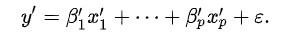

whereas y' be the centred y and x_{j}'} be the standardized x_{j}. Parameters beta _{j} in the original model, including beta _{0}}\beta _{0}, are simple functions of beta _{j}' in the standardized model. The standardization of variables does not change their correlations, so {x_{1}',x_{2}',......... ,x_{q}'\}} is a group of strongly correlated variables in an APC arrangement and they are not strongly correlated with other predictor variables in the standardized model

***************Accuracy*****************
Accuracy LinearRegression() :0.9999995928659845


***************Mean Absolute Error***************
Mean absolute error : 1455.364403799979


***************Mean Squared Error***************
MSE: 3414857.975728526


***************R2 - Score***************
r2_score: 0.9999995928659845


***************Actual vs Predicted***************


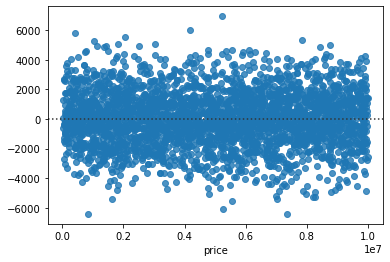

<Figure size 2880x1656 with 0 Axes>

In [23]:
lin_mod = LinearRegression()
models_algorithm(lin_mod,X_train,y_train)

### Decison Tree Regressor

Decision tree builds regression or classification models in the form of a tree structure which breaks down a 
dataset into smaller and smaller subsets while at the same time an associated decision tree is 
incrementally developed. The final result is a tree with decision nodes and leaf nodes.

#### Example:
Formula:$$\frac{(x_{i}-\bar{x})}{std.}$$

$$E(s)=\sum\limits_{i=1}{-p_{i}}{log_{2}}{p_{i}}$$

***************Accuracy*****************
Accuracy DecisionTreeRegressor() :0.9999959374504397


***************Mean Absolute Error***************
Mean absolute error : 4566.8578333333335


***************Mean Squared Error***************
MSE: 34074848.1845501


***************R2 - Score***************
r2_score: 0.9999959374504397


***************Actual vs Predicted***************


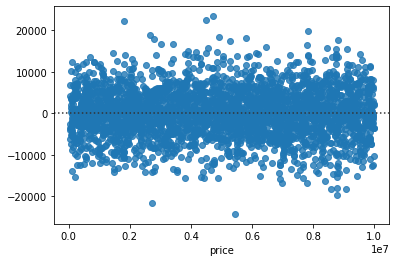

<Figure size 2880x1656 with 0 Axes>

In [24]:
dec_mod = DecisionTreeRegressor()
models_algorithm(dec_mod,X_train,y_train)

### Random Forest Regressor


A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset 
and uses averaging to improve the predictive accuracy and control over-fitting.

For regression tasks, the mean or average prediction of the individual trees is returned. Random decision forests correct for decision trees' habit of overfitting to their training set. Random forests generally outperform decision trees, but their accuracy is lower than gradient boosted trees. However, data characteristics can affect their performance

> For our model which is classification type, we should use Entropy like we use in Decision Tree Regressor.

### Formula

$$Entropy=\sum\limits_{i=1}^{c}-f_{i}log(f_{i})$$

$$f_{i} is the frequency of label "i" at a node and c is the units of unique labels.$$

***************Accuracy*****************
Accuracy RandomForestRegressor() :0.9999980842999646


***************Mean Absolute Error***************
Mean absolute error : 3215.0694976666546


***************Mean Squared Error***************
MSE: 16068034.840121277


***************R2 - Score***************
r2_score: 0.9999980842999646


***************Actual vs Predicted***************


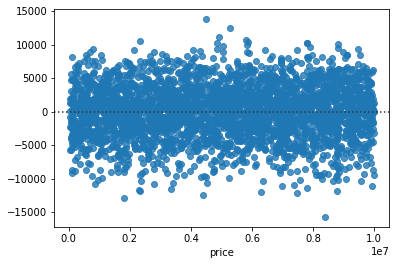

<Figure size 2880x1656 with 0 Axes>

In [25]:
ran_mod = RandomForestRegressor()
models_algorithm(ran_mod,X_train,y_train)

### Support Vector Machine Regressor


The Support Vector Machine approach uses the kernel method, discussed below, to map the data with a non-linear transformation to a higher dimensional space and in that space attempts to nd a linear separating surface between the two classes(Gualtieria).

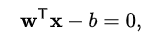

***************Accuracy*****************
Accuracy SVR() :-0.00017777656657336216


***************Mean Absolute Error***************
Mean absolute error : 2513815.782230758


***************Mean Squared Error***************
MSE: 8389043724526.383


***************R2 - Score***************
r2_score: -0.00017777656657336216


***************Actual vs Predicted***************


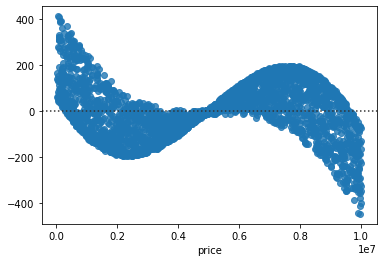

<Figure size 2880x1656 with 0 Axes>

In [26]:
svr_mod = SVR(kernel = 'rbf')
models_algorithm(svr_mod,X_train,y_train)

### Ridge Linear Model


Ridge regression is almost identical to linear regression (sum of squares) except we introduce a small amount of bias. In return, we get a significant drop in variance. In other words, by starting with a slightly worse fit, Ridge Regression can provide better long term predictions.

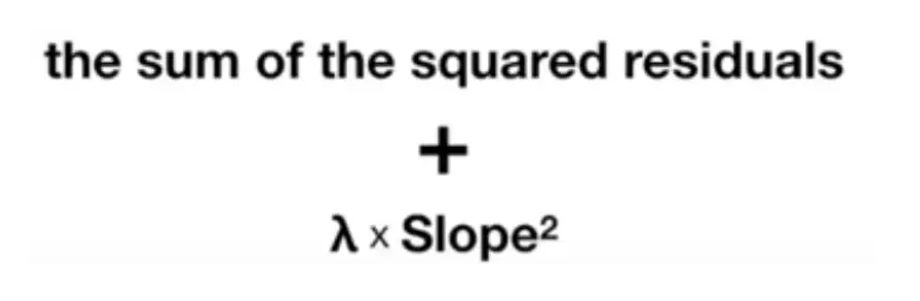

***************Accuracy*****************
Accuracy Ridge() :0.9999995928629406


***************Mean Absolute Error***************
Mean absolute error : 1455.3686118397989


***************Mean Squared Error***************
MSE: 3414883.507128333


***************R2 - Score***************
r2_score: 0.9999995928629406


***************Actual vs Predicted***************


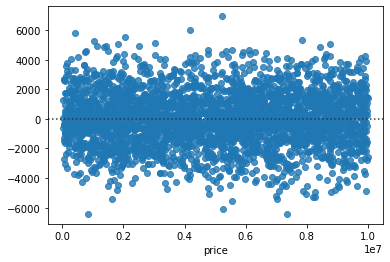

<Figure size 2880x1656 with 0 Axes>

In [27]:
rid_mod = Ridge()
models_algorithm(rid_mod,X_train,y_train)

### Lasso linear Regerssion


Lasso Regression is almost identical to Ridge Regression, the only difference being that we take the absolute value as opposed to the squaring the weights when computing the ridge regression penalty.

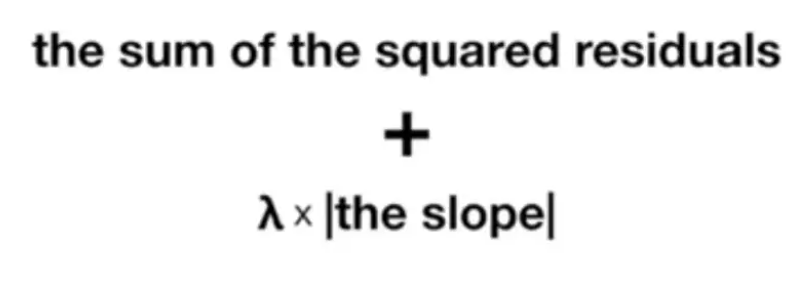

As a result of taking the absolute value, Lasso Regression can shrink the slope all the way down to 0. whereas Ridge Regression can only shrink the slope asymptotically close to 0.

***************Accuracy*****************
Accuracy Lasso() :0.9999995928084857


***************Mean Absolute Error***************
Mean absolute error : 1455.4621449538745


***************Mean Squared Error***************
MSE: 3415340.24998818


***************R2 - Score***************
r2_score: 0.9999995928084857


***************Actual vs Predicted***************


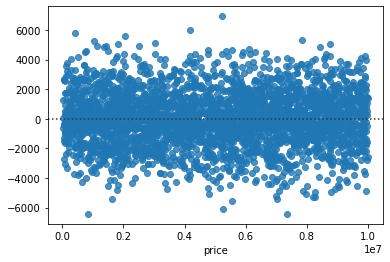

<Figure size 2880x1656 with 0 Axes>

In [28]:
las_mod = Lasso()
models_algorithm(las_mod,X_train,y_train)

## From the above data model i.e., Linear Regression, Lasso Regression, Ridge Regression, Decision Tree Regressor, Random Forest Regressor and Support Vector Regression, except SVR, all other machine learning models performs great yielding 99% accuracy score. 